#LOAD DATA FROM KAGGLE

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("awsaf49/brats20-dataset-training-validation")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brats20-dataset-training-validation


In [3]:
path="/root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1"

#INSTALL AND IMPORT NECESSARY MODULES AND LIBRARIES

In [4]:
!pip install dicom2nifti

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 49.4 MB/s eta 0:00:00


In [5]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 111.4 MB/s eta 0:00:00


In [6]:
import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
import numpy as np

#EXPLORE DATA SET AND ITS CHARACTERISTICS

In [ ]:
brain_vol=nib.load("/root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii")
type(brain_vol)
print(brain_vol.header)#view metadata

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0

In [ ]:
brain_vol_data = brain_vol.get_fdata()
type(brain_vol_data)
brain_vol_data=np.asarray(brain_vol_data)
brain_vol_data.shape
print(brain_vol_data[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
brain_vol_data.shape

(240, 240, 155)

#homogeniété de shape de les niftl

In [ ]:
import os
import nibabel as nib


dataset_path = '/root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1'


for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".nii.gz") or file.endswith(".nii"):  # Check for NIfTI files
            file_path = os.path.join(root, file)

            # Load the NIfTI file using nibabel
            try:  # Add a try-except block to handle potential errors
                img = nib.load(file_path)
                img_shape = img.shape
                print(f"File: {file}, Shape: {img_shape}")
            except Exception as e:
                print(f"Error loading file: {file_path}, Error: {e}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

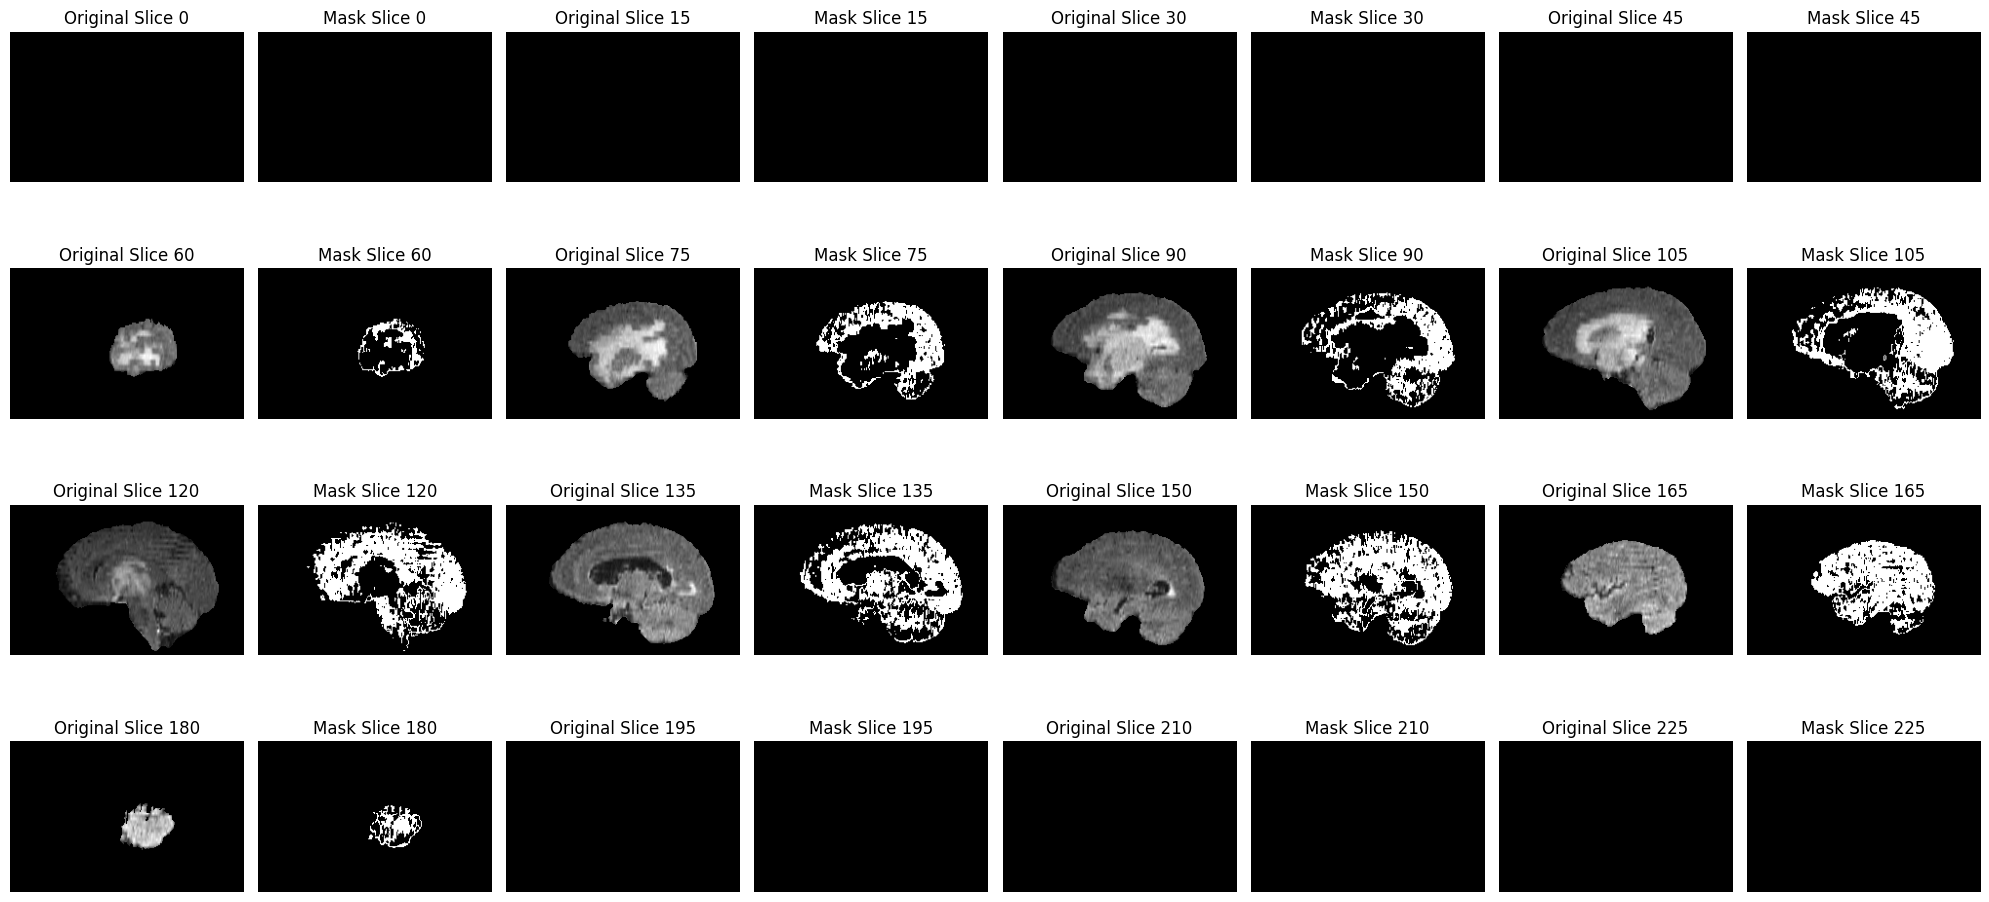

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]  # Assuming brain_mask has the same shape
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols * 2, figsize=[20, 10]) # Create double the columns

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    # Display original slice
    axs.flat[idx * 2].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx * 2].axis('off')
    axs.flat[idx * 2].set_title(f'Original Slice {img}')

    # Display mask for the same slice
    axs.flat[idx * 2 + 1].imshow(ndi.rotate(brain_mask[img, :, :], 90), cmap='gray')
    axs.flat[idx * 2 + 1].axis('off')
    axs.flat[idx * 2 + 1].set_title(f'Mask Slice {img}')

plt.tight_layout()
plt.show()

In [ ]:
plt.imshow(ndi.rotate(tumor_mask1[100, :, :], 90), cmap='gray')
plt.axis('off')
plt.title('Tumor Mask Slice 101')
plt.show()

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Paths to your image and segmentation files
image_path = "/root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii"  # Replace with your image path
seg_path = "/root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1/masks/BraTS20_Training_001_seg.nii"  # Replace with your segmentation path

# Load image and segmentation data
image_data = nib.load(image_path).get_fdata()
seg_data = nib.load(seg_path).get_fdata()

# Select a slice to display
slice_index = 100  # Choose the slice you want to visualize

# Get the image and segmentation slice
image_slice = image_data[:, :, slice_index]
seg_slice = seg_data[:, :, slice_index]

# Create a mask for the segmentation (optional)
# This highlights the segmented regions in a different color
seg_mask = np.ma.masked_where(seg_slice == 0, seg_slice)



plt.subplot(1, 2, 2)
plt.imshow(image_slice, cmap="gray")
plt.imshow(seg_mask, cmap="jet", alpha=0.5)  # Overlay with transparency
plt.title("Segmentation Overlay")
plt.axis("off")

plt.show()

In [ ]:
!pip install dipy # Install dipy library

#hisrogramme

In [ ]:
plt.plot(ndi.histogram(brain_vol_data, min=0, max=np.max(brain_vol_data), bins=50))
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras-unet-collection  # Assurez-vous d'avoir TensorFlow installé

from keras_unet_collection import models

In [ ]:
import cucim
import cupy as cp
import nibabel as nib

/usr/local/lib/python3.11/dist-packages/cupy/_environment.py:541: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [ ]:
import os
import shutil

# Define paths
dataset_path = "/root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1"  # Path to your dataset
mask_folder = os.path.join("/kaggle/working", "masks")  # Create "masks" folder
image_folder = os.path.join("/kaggle/working", "images")  # Create "images" folder

# Create folders if they don't exist
os.makedirs(mask_folder, exist_ok=True)
os.makedirs(image_folder, exist_ok=True)

# Loop through files and copy segmentation masks
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith("seg.nii"):  # Detect files ending with "seg.nii"
            source_path = os.path.join(root, file)
            destination_path = os.path.join(mask_folder, file)
            shutil.copy(source_path, destination_path) # Change shutil.move to shutil.copy
            print(f"Copied: {source_path} to {destination_path}")
        else:
           if file.endswith(".nii"):
            source_path = os.path.join(root, file)
            destination_path = os.path.join(image_folder, file)
            shutil.copy(source_path, destination_path) # Change shutil.move to shutil.copy
            print(f"Copied: {source_path} to {destination_path}")

Copied: /root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_007/BraTS20_Validation_007_t2.nii to /kaggle/working/images/BraTS20_Validation_007_t2.nii
Copied: /root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_007/BraTS20_Validation_007_t1ce.nii to /kaggle/working/images/BraTS20_Validation_007_t1ce.nii
Copied: /root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_007/BraTS20_Validation_007_flair.nii to /kaggle/working/images/BraTS20_Validation_007_flair.nii
Copied: /root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_007/BraTS20_Validation_007_t1.nii to

OSError: [Errno 28] No space left on device: '/root/.cache/kagglehub/datasets/awsaf49/brats20-dataset-training-validation/versions/1/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_303/BraTS20_Training_303_flair.nii' -> '/kaggle/working/images/BraTS20_Training_303_flair.nii'

In [ ]:
import shutil
import os

def delete_all_contents(folder_path):
    """Deletes all folders, subfolders, and files within the given folder path."""
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

# Example usage: Delete the contents of the 'my_folder' directory
folder_to_delete = '/root/.cache/kagglehub/datasets/awsaf49'  # Replace with the actual path
delete_all_contents(folder_to_delete)

In [ ]:
!nvidia-smi

Sun Apr  6 00:32:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   72C    P0             31W /   70W |     524MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#load data and train test split
image_folder="/kaggle/working/images"
mask_folder="/kaggle/working/masks"


In [ ]:
import os
import nibabel as nib
import numpy as np
import cupy as cp

def load_and_resize_data(image_folder, mask_folder, target_size=(128, 128, 128, 3), batch_size=16):
    image_data = []
    mask_data = []
    n = 0

    # Get list of image filenames
    image_filenames = [f for f in os.listdir(image_folder) if f.endswith((".nii", ".nii.gz"))]
    num_images = len(image_filenames)

    # Process images in batches
    for i in range(0, num_images, batch_size):
        batch_filenames = image_filenames[i : i + batch_size]  # Get filenames for this batch

        batch_image_data = []
        batch_mask_data = []

        for filename in batch_filenames:
           if n<10:
            image_path = os.path.join(image_folder, filename)
            mask_path = os.path.join(mask_folder, filename.replace("_flair", "_seg").replace("_t1", "_seg").replace("_t1ce", "_seg").replace("_t2", "_seg"))

            if os.path.exists(mask_path):
                try:
                    # Load images with nibabel
                    img = nib.load(image_path).get_fdata()
                    mask = nib.load(mask_path).get_fdata()

                    # Move data to GPU
                    img_gpu = cp.asarray(img)
                    mask_gpu = cp.asarray(mask)

                    # Resize on GPU
                    img_resized = cp.resize(img_gpu, target_size)
                    mask_resized = cp.resize(mask_gpu, target_size)

                    # Move data back to CPU
                    batch_image_data.append(cp.asnumpy(img_resized))
                    batch_mask_data.append(cp.asnumpy(mask_resized))
                    n += 1
                    print(n)

                except Exception as e:
                    print(f"Error processing {filename}: {e}")

        # Append batch data to overall lists
        image_data.extend(batch_image_data)
        mask_data.extend(batch_mask_data)

    return np.array(image_data), np.array(mask_data)

# Example usage (assuming image_folder and mask_folder are defined)
image_data, mask_data = load_and_resize_data(image_folder, mask_folder, batch_size=32)

print(f"Image Data Shape: {image_data.shape}")
print(f"Mask Data Shape: {mask_data.shape}")

1
2
3
4
5
6
7
8
9
10
Image Data Shape: (10, 128, 128, 128, 3)
Mask Data Shape: (10, 128, 128, 128, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, mask_data, test_size=0.2, random_state=42)


In [ ]:
import keras
print(keras.__version__)

3.8.0


In [7]:
# Config
seed = 42  # for reproducibility
training_split_ratio = 0.9  # use 90% of samples for training, 10% for testing
num_epochs = 5

# If the following values are False, the models will be downloaded and not computed
compute_histograms = False
train_whole_images = False
train_patches = False

In [8]:
!pip install --quiet --upgrade pip
!pip install --quiet --upgrade niwidgets
!pip install --quiet --upgrade highresnet
!pip install --quiet --upgrade unet
!pip install --quiet --upgrade torchio
!apt-get -qq install tree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 103.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 171.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building 

In [9]:
import copy
import enum
import random; random.seed(seed)
import warnings
import tempfile
import subprocess
import multiprocessing
from pathlib import Path

import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
torch.manual_seed(seed)

import torchio as tio
from torchio import AFFINE, DATA

import numpy as np
import nibabel as nib
from unet import UNet
from scipy import stats
import SimpleITK as sitk
import matplotlib.pyplot as plt

from IPython import display
from tqdm.notebook import tqdm

print('TorchIO version:', tio.__version__)

TorchIO version: 0.20.7


In [23]:
import os
import shutil

# Define paths
dataset_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
output_folder = "/kaggle/working/organized_data"  # Choose your desired output folder
images_folder = os.path.join(output_folder, "images")
labels_folder = os.path.join(output_folder, "labels")

# Create output folders
os.makedirs(images_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)

# Iterate through dataset and organize files
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith((".nii", ".nii.gz")):
            source_path = os.path.join(root, file)
            if file.endswith("_seg.nii.gz"):  # Assuming segmentation files end with _seg.nii.gz
                destination_path = os.path.join(labels_folder, file)
            else:  # Other image files (flair, t1, t1ce, t2)
                destination_path = os.path.join(images_folder, file)

            shutil.copy(source_path, destination_path)
            print(f"Copied: {source_path} to {destination_path}")

print("Data organization completed.")

Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_flair.nii to /kaggle/working/organized_data/images/BraTS20_Training_083_flair.nii
Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_t1.nii to /kaggle/working/organized_data/images/BraTS20_Training_083_t1.nii
Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_seg.nii to /kaggle/working/organized_data/images/BraTS20_Training_083_seg.nii
Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_083/BraTS20_Training_083_t2.nii to /kaggle/working/organized_data/images/BraTS20_Training_083_t2.nii
Copied: /kaggle/input/brats20-dataset-training-validation/BraTS2020_Training

KeyboardInterrupt: 

In [25]:
import os
import torchio as tio
from torchio.transforms import (
    RandomFlip,
    RandomAffine,
    RandomElasticDeformation,
    RandomNoise,
    RandomMotion,
    RandomBiasField,
    RescaleIntensity,
    Resample,
    ToCanonical,
    ZNormalization,
    CropOrPad,
    HistogramStandardization,
    OneOf,
    Compose,
)

# Define paths to your images and labels folders
images_folder = "/kaggle/working/organized_data/images"
labels_folder = "/kaggle/working/organized_data/labels"

# Define landmarks for HistogramStandardization
landmarks = [0.1, 0.3, 0.5, 0.7, 0.9]

# Define transforms
training_transform = Compose([
    ToCanonical(),
    Resample(4),
    CropOrPad((48, 60, 48), padding_mode='reflect'),
    RandomMotion(),
    HistogramStandardization({'mri': landmarks}),
    RandomBiasField(),
    ZNormalization(masking_method=ZNormalization.mean),
    RandomNoise(),
    RandomFlip(axes=(0,)),
    OneOf({
        RandomAffine(): 0.8,
        RandomElasticDeformation(): 0.2,
    }),
])

validation_transform = Compose([
    ToCanonical(),
    Resample(4),
    CropOrPad((48, 60, 48), padding_mode='reflect'),
    HistogramStandardization({'mri': landmarks}),
    ZNormalization(masking_method=ZNormalization.mean),
])


# Create a list of subjects
subjects = []
for image_name in os.listdir(images_folder):
    if image_name.endswith((".nii", ".nii.gz")):
        image_path = os.path.join(images_folder, image_name)
        label_name = image_name.replace("_flair", "_seg").replace("_t1", "_seg").replace("_t1ce", "_seg").replace("_t2", "_seg")  # Assuming label file naming
        label_path = os.path.join(labels_folder, label_name)

        if os.path.exists(label_path):
            subject_dict = {
                'mri': tio.Image(image_path, type=tio.INTENSITY),
                'label': tio.Image(label_path, type=tio.LABEL),
            }
            subject = tio.Subject(subject_dict)
            subjects.append(subject)




In [32]:
# prompt: continue until we have reach step of training our unet model with nii file define and complete validation code
from sklearn.model_selection import train_test_split
# Split the dataset into training and validation sets

subjects = tio.datasets.BraTS2020(download=True)
train_subjects, val_subjects = train_test_split(subjects, train_size=0.8, random_state=seed)

# Create the training and validation datasets using torchio
train_dataset = tio.SubjectsDataset(train_subjects, transform=training_transform)
val_dataset = tio.SubjectsDataset(val_subjects, transform=validation_transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)  # Adjust batch_size
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False)    # Adjust batch_size


# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model initialization
model = UNet(in_channels=1, out_channels=3, init_features=32).to(device) # Adjust in_channels and out_channels

# Optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss()


# Training loop
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    for batch in tqdm(loader):
        inputs = batch["mri"][tio.DATA].to(device).float()
        targets = batch["label"][tio.DATA].to(device).long() # Changed to .long()
        optimizer.zero_grad()
        outputs = model(inputs)

        # Resize outputs to match targets
        outputs = F.interpolate(outputs, size=targets.shape[2:], mode='trilinear', align_corners=False)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(loader)

# Validation loop
def evaluate_model(model, loader, criterion, device):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for batch in tqdm(loader):
            inputs = batch["mri"][tio.DATA].to(device).float()
            targets = batch["label"][tio.DATA].to(device).long() # Changed to .long()
            outputs = model(inputs)
            outputs = F.interpolate(outputs, size=targets.shape[2:], mode='trilinear', align_corners=False)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
    return epoch_loss / len(loader)

# Training loop
num_epochs = 5  # Set your desired number of epochs
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = evaluate_model(model, val_loader, criterion, device)

    print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")


AttributeError: module 'torchio.datasets' has no attribute 'BraTS2020'